In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import astropy.units as u
from astropy.visualization import quantity_support

In [5]:
plt.rc('axes', labelsize=14)
plt.rc('figure', titlesize=30)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

In [57]:
def transfer(f,t):
    '''
    t is the integration time of the signal and pedestal levels
    f is the frequency at which the ccd is clocked
    '''
    noise_density = 2 * (np.sin((np.pi * f * t).to(u.rad)))**2 / ((np.pi * f * t).to(u.rad))
    return noise_density

def sig_cds(ewn, t, f1, f2):
    '''
    ewn is voltage noise density of white noise
    '''
    return ewn * np.sqrt(1/t + 4*f1*np.log(2) + 4/3 * f2**2 * np.pi**2 * t)

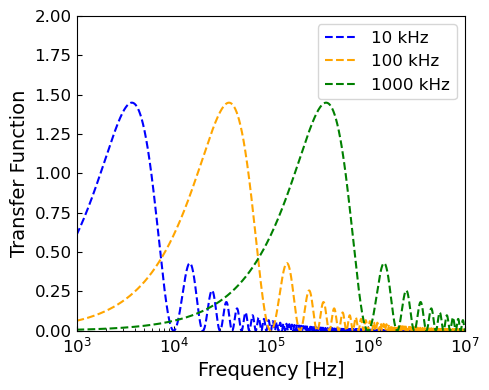

In [63]:
quantity_support()

fig, ax = plt.subplots(1, 1, figsize=(5,4), layout='tight')


freqs = np.logspace(0,10,10000) * u.Hz * u.rad * 2 * np.pi
tau = np.logspace(-9, -3, 10000) * u.s 

int_time_1 = 5.5e-6 * u.s
int_time_2 = 55e-6 * u.s

int_speed_10 = 1/(10*u.kHz)
int_speed_100 = 1/(100*u.kHz)
int_speed_1000 = 1/(1*u.MHz)

ax.plot(freqs, transfer(freqs, int_speed_10), label = '{:.0f}'.format((1/int_speed_10).to(u.kHz)), color = 'blue', ls='--')
ax.plot(freqs, transfer(freqs, int_speed_100), label = '{:.0f}'.format((1/int_speed_100).to(u.kHz)), color = 'orange', ls='--')
ax.plot(freqs, transfer(freqs, int_speed_1000), label = '{:.0f}'.format((1/int_speed_1000).to(u.kHz)), color='green', ls='--')

ax.set_xlabel(r'Frequency [Hz]')
ax.set_ylabel(r'Transfer Function')
ax.legend(loc = 'best')
ax.set_xlim(1e3, 1e7)
ax.set_xscale('log')
ax.set_ylim(0, 2)

ax.tick_params(axis='both', direction='in', which='both')


fig.tight_layout()

plt.savefig('/home/baparker/GitHub/Research/CCDs/cds_transfer_func.png', dpi=250)
plt.show()

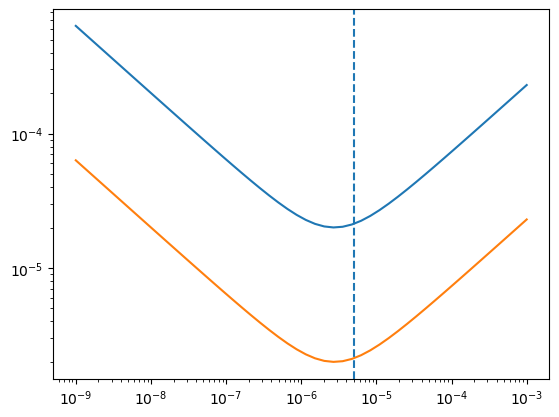

In [46]:
f = np.logspace(3,7,1000)
tau = np.logspace(-9, -3)

plt.plot(tau, sig_cds(2e-8, tau, 100e3, 100e3))
plt.plot(tau, 1/np.sqrt(100) * sig_cds(2e-8, tau, 100e3, 100e3))
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e3, 1e7)
# plt.ylim(1e-9, 1e-5)
plt.axvline(1/200e3, ls='--')

(1000.0, 10000000.0)

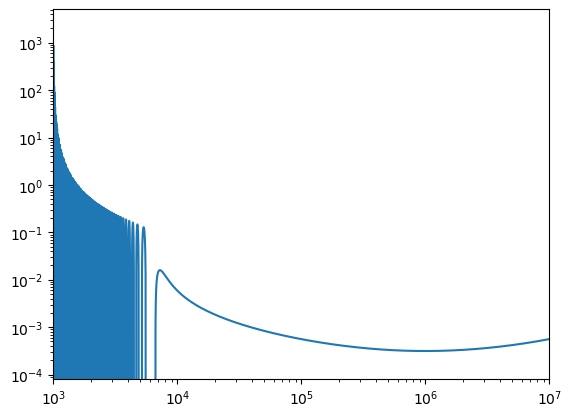

In [56]:
f = np.logspace(3,7,10000)
tau = np.logspace(-9, -3, 10000)

plt.plot(1/tau, fft.fft(transfer(100e3, tau)))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e3, 1e7)
# plt.ylim(1e-9, 1e-5)